## Project description
The idea was to create a data base from the answers of a prepared survey. The overall goal of this
project is to understand and summarize the questionnaire answers; and eventually to extract major trends.
Our project is about Brain Drain in Tunisia. In this regard, a survey was conducted among Tunisian people in order to get answers of several questions about this topic. As a team, we are mainly interested in making analysis about two basic questions among all the questions being answered :
- What are the reasons that would push you to leave Tunisia ? (Question 4)
- Socially, what’s the difference between Tunisia and abroad in social life ? (Question 5)

This script concerns the work we will do about the answers of Question 5.

## Text Mining Project Pipeline
0. Read questionnaire data from csv file
1. Initialize raw corpus (for example, select Q4 and Q5 answers only)
2. Text cleaning (NLTK library)
3. Text representation using BOW-tfidf model (Scikit-learn library)
4. Topic modeling
5. Clustering
6. Predictive modeling
7. Visualization and interpretation of final results

Through this project, we use several python libraries. 
- Numpy is a library for scientific calculations in Python. 
- Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools.
- Matplotlib is a library for visualization data in the form of graphics.

In [1]:
import pandas as pd   # for DataFrames  -- resembles relational DB and SQL
import numpy as np    # for mathematical operations -- resembles Matlab 

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

## 1) Read questionnaire data

In [3]:
# Read data from a CSV file : this will return a DataFrame object
df = pd.read_csv("C:/Users/MounaB/Desktop/Mastere TICV/Cours/Lecons/Text Mining/data.csv", sep=';',encoding='iso-8859-1')

In [4]:
df.shape #Dataframe dimension

(258, 16)

In [5]:
df.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?
0,10/30/2018 18:57:24,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...
1,10/30/2018 22:33:57,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche
2,10/31/2018 10:25:17,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation
3,10/31/2018 10:28:55,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere..."
4,10/31/2018 10:29:24,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ..."


In [6]:
df.columns # names of Dataframe columns

Index(['Timestamp', 'Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude',
       'Etablissement d'études', 'Situation professionnelle', 'Région',
       'Domaine d'études',
       'Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire "autre" si vous ne l'avez pas)',
       'Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?',
       'Q2 : Quel salaire vous fera rester en Tunisie ?',
       'Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?',
       'Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?',
       'Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?',
       'Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?'],
      dtype='object')

In [7]:
pd.DataFrame(df.iloc[:,14].value_counts().head()) # count numbers in each answer category

,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?
la mentalité,5
Mentalité,4
La mentalité,4
le respect,3
Respect,2


We note that the answer **mentalité** has the most counts.

## 2) Prepare corpus for analyzing Q5

Terminology:
- Corpus = list of documents
- Document = string (sequence of characters)

In [8]:
Q5_corpus = df.iloc[:,14].tolist()

In [9]:
print(type(Q5_corpus))
print(type(Q5_corpus[0]))
print(len(Q5_corpus))     #number of documents in corpus
print(len(Q5_corpus[0]))  #number of characters in first document of corpus

<class 'list'>
<class 'str'>
258
39


### Visualize Distribution of Characters in Corpus

In [10]:
import re
from nltk import FreqDist
from tabulate import tabulate

In [11]:
Q5_chars_list = "\n".join(Q5_corpus)

In [12]:
print(type(Q5_chars_list))
print(len(Q5_chars_list))

<class 'str'>
14270


In [13]:
fdist5 = FreqDist([c for c in Q5_chars_list])

In [14]:
fdist5

FreqDist({' ': 2108, 'e': 1799, 's': 941, 'i': 931, 't': 904, 'a': 829, 'n': 811, 'l': 717, 'r': 687, 'u': 612, ...})

We note that the word **"vie"** was used 61 times and it's the most frequented.

In [15]:
print("number of characters:" + str(fdist5.N()))
print("number of unique characters:" + str(fdist5.B()))

number of characters:14270
number of unique characters:76


In [16]:
print('List of unique characters in the corpus:')
print(list(fdist5.keys()))
len(list(fdist5.keys()))

List of unique characters in the corpus:
['A', ' ', 'l', "'", 'é', 't', 'r', 'a', 'n', 'g', 'e', 'o', 'u', 'v', 'p', 's', 'd', 'c', '.', '\n', 'L', 'h', 'm', 'i', 'f', 'q', 'U', 'è', 'T', '"', 'à', 'M', 'I', 'b', ',', '!', '(', 'j', ')', 'É', 'x', '+', 'ê', 'P', 'C', 'y', 'k', '3', 'ç', 'J', '-', '5', 'ô', 'N', 'E', '1', '0', 'ù', '/', ';', ':', '?', 'F', 'R', 'S', 'D', 'z', 'O', 'w', '>', 'À', 'B', 'Ç', 'Q', 'G', 'V']


76

We note that there are 76 unique caracters in the corpus.

In [17]:
# strange characters
for c in ['ù', 'û', 'ô', 'â', 'î', 'ê', 'É']:
    print(c,fdist5[c])

ù 2
û 0
ô 1
â 0
î 0
ê 19
É 1


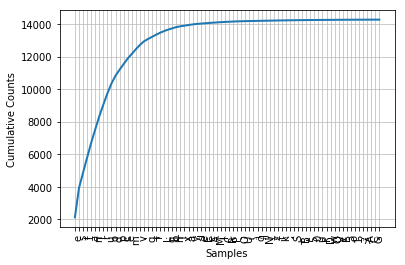

In [18]:
fdist5.plot(cumulative=True)

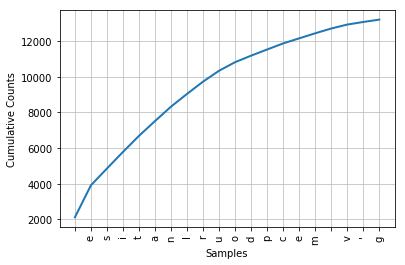

In [19]:
fdist5.plot(20,cumulative=True)

We note that the top 20 characters cover more than 95% of all character occurrences in the corpus. As we can notice there are characters like this symbol **" ' "** that should be removed. We will do such a task later in the step of cleaning. 

In [20]:
# the 10 most frequent characters in the corpus
fdist5.most_common(10)

[(' ', 2108),
 ('e', 1799),
 ('s', 941),
 ('i', 931),
 ('t', 904),
 ('a', 829),
 ('n', 811),
 ('l', 717),
 ('r', 687),
 ('u', 612)]

In [21]:
# the 20 most frequent characters in the corpus
u = pd.DataFrame(fdist5.most_common(20))
u.columns = ['character', 'frequency']
u

,character,frequency
0,,2108
1,e,1799
2,s,941
3,i,931
4,t,904
5,a,829
6,n,811
7,l,717
8,r,687
9,u,612


## 3) Data Cleaning using NLTK

The Pipeline:
1. Language identification
2. Remove useless characters
3. Convert to lowercase
4. Tokenization
5. Stemming

### Language identification
Our corpus contains answers in multiple languages. We will only select answers in French.

In [22]:
# Load library module for language identification
from nltk.classify.textcat import TextCat

# You will have to download some resources the first time that you use this library
import nltk #The Natural Language Toolkit is a suite of libraries and programs for symbolic and statistical natural 
#language processing (NLP) for texts
nltk.download('crubadan')
nltk.download('punkt')

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# create class instance
import regex
tc = TextCat()

In [24]:
# quick test on first document in corpus
print(Q5_corpus[0])
print(tc.guess_language(Q5_corpus[0]))

A l'étranger on trouve plus de respect.
fra


**"fra"** shows that the first document is expressed in French language.

In [25]:
# now run langid on the entire corpus
# THIS COMMAND WILL TAKE A RELATIVELY LONG TIME (~ 1 MINUTE)
res = [tc.guess_language(doc) for doc in Q5_corpus]

In [26]:
type(res)

list

In [27]:
len(res)

258

In [28]:
pd.Series(res).value_counts()

fra     200
lld      21
eng       6
eng       5
cat       4
lnc       3
fur       3
luo       2
kha       2
abk       1
glg       1
ina       1
rcf       1
swe       1
fri       1
glv       1
ita       1
bug       1
pau       1
tpi       1
ssw       1
dtype: int64

**206** documents are expressed in French language.

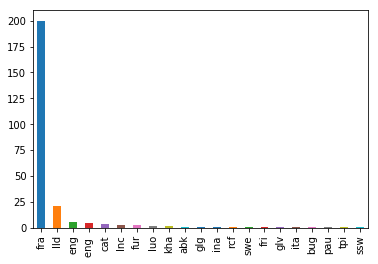

In [29]:
pd.Series(res).value_counts().plot(kind='bar')

The highest bar shows that most of documents are expressed in French language.

In [30]:
# Display documents classified as FRENCH
[(res[i],doc) for i,doc in enumerate(Q5_corpus) if res[i] == 'fra']

[('fra', "A l'étranger on trouve plus de respect."),
 ('fra', 'La valeur d homme'),
 ('fra', 'la tolérance'),
 ('fra',
  'La mentalité sur le niveau professionnel et social ainsi que le niveau de vie'),
 ('fra', 'Une meilleure parité en matière de compétence'),
 ('fra', 'la sécurité'),
 ('fra', 'la famille'),
 ('fra',
  'Tout dépend de ce que l\'on veut dire par "à l\'étranger". la question est trop vague.'),
 ('fra', "La diversité culturelle à l'étranger"),
 ('fra', "L'ouverture d'esprit"),
 ('fra', "Le respect de l'art, la culture et l'éducation"),
 ('fra', 'les mentalités !!'),
 ('fra', 'Le respect et la dignité'),
 ('fra',
  "la discipline, le respect de l'autre, la dignité, le civisme, le patriotisme (tout ce que je viens de citer est manquant en Tunisie)"),
 ('fra', 'Éthique, mentalité,'),
 ('fra', 'tous'),
 ('fra',
  "Les relations humaines et L'esprit de groupe sont plus développés en Tunisie"),
 ('fra', 'la mentalité diffère et en Tunisie il existe une crise identitaire'),
 ('

In [31]:
# Display documents NOT classified as FRENCH
Q5_corpus_fr1 = [(res[i],doc) for i,doc in enumerate(Q5_corpus) if res[i] != 'fra']

In [32]:
# a quick heuristic method for removing non-French documents from corpus
Q5_corpus_fr = [doc for i,doc in enumerate(Q5_corpus) if res[i] != 'eng']

1) Here we dispaly a method to quickly select French documents only.

In [33]:
Q5_corpus_fr2 = [doc for i,doc in enumerate(Q5_corpus) if res[i] == 'fra']

2) We can also manually remove or translate documents in other languages (Tunisian dialect, english)

3) There is a third method by using the goslate library that hepls to translate documents.

In [34]:
#Select all non French documents 
Q5_corpus_fr2 = [doc for i,doc in enumerate(Q5_corpus) if res[i] != 'fra']

In [35]:
import goslate
gs = goslate.Goslate()
#[gs.translate(x, "fra") for x in Q5_corpus_fr2]

In [36]:
doc_filter_1 = [res[i] != 'eng' for i,doc in enumerate(Q5_corpus)]
assert(np.sum(doc_filter_1) == len(Q5_corpus_fr))
doc_filter_1[0:5]

[True, True, True, True, True]

In [37]:
# make sure the new corpus is a list of strings
type(Q5_corpus_fr),type(Q5_corpus_fr[0])

(list, str)

In [38]:
len(Q5_corpus_fr)   # number of documents in the corpus

252

### Remove non-word characters + Convert to lowercase + Tokenize

In [39]:
# This tokenization method throws away all non-word characters (word characters = letters, digits, _ )
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[^_\W]+')

In [40]:
# convert to lowercase and tokenize
# Remark: the right side of this expression is called a COMPREHENSION - it's a quick way of creating a list in Python
Q5_corpus_fr_words = [tokenizer.tokenize(doc.lower()) for doc in Q5_corpus_fr]

In [41]:
# make sure the new corpus is a list of lists of strings
type(Q5_corpus_fr_words),type(Q5_corpus_fr_words[0]),type(Q5_corpus_fr_words[0][0])

(list, list, str)

In [42]:
len(Q5_corpus_fr_words)    # number of documents in the new corpus

252

In [43]:
Q5_corpus_fr_words[0]      # first document in the new corpus

['a', 'l', 'étranger', 'on', 'trouve', 'plus', 'de', 'respect']

### Remove stopwords
We will use NLTK's default list of stop worsd for the French language.

In [44]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MounaB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# Load stop words
stop_words_fr = stopwords.words('french')

In [46]:
print(type(stop_words_fr))
print(len(stop_words_fr))

<class 'list'>
155


In [47]:
# Show some stop words
stop_words_fr[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [48]:
# we can also add an entire list of words
stop_words_fr = stop_words_fr + ['les','être','avoir','parce','où','si','chaque','donc','dont','encore','faut','quand','tant','tel','tout','va','vient','peut','veut']

In [49]:
# Remove stop words from our corpus
Q5_corpus_fr_words_2 = [[word for word in doc  if word not in stop_words_fr] for doc in Q5_corpus_fr_words]
Q5_corpus_fr_words_2

[['a', 'étranger', 'trouve', 'plus', 'respect'],
 ['valeur', 'homme'],
 ['tolérance'],
 ['mentalité', 'niveau', 'professionnel', 'social', 'ainsi', 'niveau', 'vie'],
 ['meilleure', 'parité', 'matière', 'compétence'],
 ['sécurité'],
 ['famille'],
 ['dépend', 'dire', 'étranger', 'question', 'trop', 'vague'],
 ['mentalité'],
 ['diversité', 'culturelle', 'étranger'],
 ['ouverture', 'esprit'],
 ['incomparables'],
 ['respect', 'art', 'culture', 'éducation'],
 ['mentalités'],
 ['respect', 'dignité'],
 ['discipline',
  'respect',
  'autre',
  'dignité',
  'civisme',
  'patriotisme',
  'viens',
  'citer',
  'manquant',
  'tunisie'],
 ['éthique', 'mentalité'],
 ['salaire'],
 ['tous'],
 ['relations',
  'humaines',
  'esprit',
  'groupe',
  'plus',
  'développés',
  'tunisie'],
 ['mentalité', 'diffère', 'tunisie', 'existe', 'crise', 'identitaire'],
 ['mentalité'],
 ['mentalité', 'niveau', 'vie', 'mode', 'vie'],
 ['plus', 'liberté', 'étranger', 'faire', 'choix', 'sans', 'jugé'],
 ['ceci',
  'dépend

In [50]:
#We notice that there are still stop words so we remove them manually 
stop_words_fr = stop_words_fr + ['a','ainsi','ceci','lequel','très','etc','ya','ddans','ça','là','aussi','ici','ils','fait',
                        'font', 'is','être','in','of','memes','q','sans','car','cest','nes', 'taarf', 'kife', 't3ish','pzs']
Q5_corpus_fr_words_2 = [[word for word in doc  if word not in stop_words_fr] for doc in Q5_corpus_fr_words]

In [51]:
# make sure the new corpus is a list of lists of strings
type(Q5_corpus_fr_words_2),type(Q5_corpus_fr_words_2[0]),type(Q5_corpus_fr_words_2[0][0])

(list, list, str)

In [52]:
len(Q5_corpus_fr_words_2)   # number of documents in the new corpus

252

In [53]:
Q5_corpus_fr_words_2[0]  # the first document in the new corpus

['étranger', 'trouve', 'plus', 'respect']

In [54]:
# display the new corpus (AFTER removing stop words)
Q5_corpus_fr_words_2

[['étranger', 'trouve', 'plus', 'respect'],
 ['valeur', 'homme'],
 ['tolérance'],
 ['mentalité', 'niveau', 'professionnel', 'social', 'niveau', 'vie'],
 ['meilleure', 'parité', 'matière', 'compétence'],
 ['sécurité'],
 ['famille'],
 ['dépend', 'dire', 'étranger', 'question', 'trop', 'vague'],
 ['mentalité'],
 ['diversité', 'culturelle', 'étranger'],
 ['ouverture', 'esprit'],
 ['incomparables'],
 ['respect', 'art', 'culture', 'éducation'],
 ['mentalités'],
 ['respect', 'dignité'],
 ['discipline',
  'respect',
  'autre',
  'dignité',
  'civisme',
  'patriotisme',
  'viens',
  'citer',
  'manquant',
  'tunisie'],
 ['éthique', 'mentalité'],
 ['salaire'],
 ['tous'],
 ['relations',
  'humaines',
  'esprit',
  'groupe',
  'plus',
  'développés',
  'tunisie'],
 ['mentalité', 'diffère', 'tunisie', 'existe', 'crise', 'identitaire'],
 ['mentalité'],
 ['mentalité', 'niveau', 'vie', 'mode', 'vie'],
 ['plus', 'liberté', 'étranger', 'faire', 'choix', 'jugé'],
 ['dépend',
  'pays',
  'question',
  'co

### Visualize distribution of word lengths
This is useful for getting ideas about stemming approach (in the next step) ...

In [55]:
# create list of all words in corpus
words = {word for doc in Q5_corpus_fr_words_2 for word in doc}
type(words),len(words)

(set, 563)

In [56]:
S = pd.Series([len(word) for word in words])

In [57]:
S.describe()

count    563.000000
mean       7.472469
std        2.628317
min        2.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       17.000000
dtype: float64

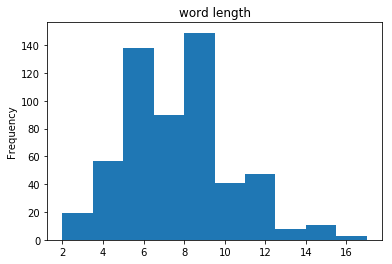

In [58]:
fig = S.plot(kind='hist', title="word length")

In [59]:
# which words have length <= 2
[word for word in words if len(word)<=2]

['ca', '5m', 'ni']

In [60]:
# words that contain more than 10 charcters
[word for word in words if len(word)>=13]

['kinésithérapeutes',
 'encouragement',
 'principalement',
 'cosmopolitisme',
 'administrations',
 'accessibilité',
 'comportements',
 'divertissement',
 'responsabilité',
 'environnement',
 'incomparables',
 'professionnel',
 'inacceptables',
 'responsabilités',
 'personnellement',
 'interpersonnelles',
 'individuelles',
 'administration',
 'digitalisation',
 'administratifs',
 'professionalisme',
 'malheureusement']

### Word normalization

In [61]:
from nltk.stem.snowball import FrenchStemmer

In [62]:
# Stemming method 1: Snowball method from NLTK
stemmer = FrenchStemmer()
Q5_corpus_fr_words_3_1 = [[stemmer.stem(word) for word in doc] for doc in Q5_corpus_fr_words_2]

In [63]:
# test this method on a few words just to see how it works
print(stemmer.stem('engagement'))
print(stemmer.stem('gouvernement'))
print(stemmer.stem('payer'))
print(stemmer.stem('pays'))

engag
gouvern
pai
pay


In [64]:
## Stemming method 2 : Dr. Chiraz's quick hack!
# step1: remove s at the end of the word if the word contains at least 6 characters
temp = [[word[0:len(word)-1] if (len(word)>=6 and word.endswith('s')) else word for word in doc] for doc in Q5_corpus_fr_words_2]
# step2: keep only the first 7 characters of the word
Q5_corpus_fr_words_3_2 = [[word[0:7] for word in doc] for doc in temp]

In [65]:
Q5_corpus_fr_words_2[0:5]

[['étranger', 'trouve', 'plus', 'respect'],
 ['valeur', 'homme'],
 ['tolérance'],
 ['mentalité', 'niveau', 'professionnel', 'social', 'niveau', 'vie'],
 ['meilleure', 'parité', 'matière', 'compétence']]

In [66]:
Q5_corpus_fr_words_3_1[0:5]

[['étrang', 'trouv', 'plus', 'respect'],
 ['valeur', 'homm'],
 ['toler'],
 ['mental', 'niveau', 'professionnel', 'social', 'niveau', 'vi'],
 ['meilleur', 'parit', 'mati', 'compétent']]

In [67]:
Q5_corpus_fr_words_3_2[0:5]

[['étrange', 'trouve', 'plus', 'respect'],
 ['valeur', 'homme'],
 ['toléran'],
 ['mentali', 'niveau', 'profess', 'social', 'niveau', 'vie'],
 ['meilleu', 'parité', 'matière', 'compéte']]

In [68]:
len(Q5_corpus_fr_words_3_2)

252

### Visualize distribution of document lengths
Length of document = number of words in document.

This is useful for verifying the results of text cleaning and getting a general idea about the corpus.

In [69]:
# create list containing the number of words in each document
L = [len(doc) for doc in Q5_corpus_fr_words_2]

In [70]:
pd.Series(L).describe()

count    252.000000
mean       4.869048
std        5.733344
min        0.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       43.000000
dtype: float64

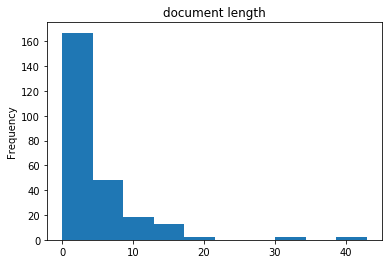

In [71]:
# frequency distribution of document lengths as a histogram
u = pd.Series(L).plot(kind='hist', title='document length')

In [72]:
# frequency distribution of document lengths as a table
pd.Series(L).value_counts().head(7)

1    53
2    53
4    33
3    24
5    17
6    15
7     9
dtype: int64

In [73]:
# Display dcuments that contain only one word
pd.Series([' '.join(doc) for doc in Q5_corpus_fr_words_2 if len(doc)==1]).value_counts().head(10)

mentalité        15
tolérance         5
rien              4
sais              4
respect           4
culture           2
mentalités        2
incomparable      2
famille           2
incomparables     1
dtype: int64

In [74]:
# Display documents that contain 2 words
pd.Series([' '.join(doc) for doc in Q5_corpus_fr_words_2 if len(doc)==2]).value_counts().head(10)

niveau vie                 4
qualité vie                3
ouverture esprit           3
qualite vie                2
mentalité respect          2
application lois           1
respectueuse développer    1
valeurs habitants          1
chaumage travail           1
respect mutuel             1
dtype: int64

In [75]:
# Display documents that contain 3 words
pd.Series([' '.join(doc) for doc in Q5_corpus_fr_words_2 if len(doc)==3]).value_counts().head(10)

mentalité niveau vie           2
niveau conscience montalité    1
beaucoup plus civilisé         1
dépend dire étranger           1
plus liberté étranger          1
respect paix generosite        1
mediocrité mentale respect     1
plus open minded               1
doit changer mentalite         1
manque respect loi             1
dtype: int64

### Visualize Distribution of Words
Just want to get an idea about the most frequently occurring words in the corpus. This is useful for verifying the results of text cleaning and getting a general idea about corpus content.

We use the ``FreqDist`` module from NLTK to obtain the frequency distribution of words of a given corpus.

In [76]:
# we will compare the distribution of words of the following three different corpora.
fdist2 = FreqDist([c for c in [word for doc in Q5_corpus_fr_words_2 for word in doc]])
fdist3 = FreqDist([c for c in [word for doc in Q5_corpus_fr_words_3_1 for word in doc]])
fdist4 = FreqDist([c for c in [word for doc in Q5_corpus_fr_words_3_2 for word in doc]])

In [77]:
# total number of words in this corpus
fdist2.N(),fdist3.N(),fdist4.N()

(1227, 1227, 1227)

In [78]:
# number of UNIQUE words in this corpus
fdist2.B(),fdist3.B(),fdist4.B()

(563, 480, 491)

In [79]:
# 10 most frequent words in this corpus
fdist2.most_common(20)

[('vie', 49),
 ('plus', 47),
 ('mentalité', 44),
 ('respect', 35),
 ('tunisie', 35),
 ('étranger', 33),
 ('niveau', 27),
 ('gens', 18),
 ('esprit', 13),
 ('pays', 13),
 ('sociale', 11),
 ('culture', 9),
 ('liberté', 9),
 ('qualité', 9),
 ('vivre', 9),
 ('moins', 9),
 ('beaucoup', 8),
 ('tunisiens', 8),
 ('entre', 8),
 ('tolérance', 7)]

In [80]:
fdist3.most_common(20)

[('mental', 50),
 ('vi', 49),
 ('plus', 47),
 ('respect', 35),
 ('tunis', 35),
 ('étrang', 33),
 ('niveau', 27),
 ('social', 18),
 ('gen', 18),
 ('tunisien', 16),
 ('esprit', 14),
 ('libert', 14),
 ('pay', 14),
 ('toler', 11),
 ('autr', 11),
 ('différent', 11),
 ('qualit', 11),
 ('famill', 9),
 ('cultur', 9),
 ('salair', 9)]

In [81]:
fdist4.most_common(20)

[('mentali', 51),
 ('tunisie', 51),
 ('vie', 49),
 ('plus', 47),
 ('respect', 40),
 ('étrange', 37),
 ('niveau', 27),
 ('gens', 18),
 ('esprit', 14),
 ('liberté', 14),
 ('pays', 13),
 ('sociale', 12),
 ('culture', 11),
 ('autre', 11),
 ('différe', 11),
 ('toléran', 9),
 ('famille', 9),
 ('salaire', 9),
 ('qualité', 9),
 ('travail', 9)]

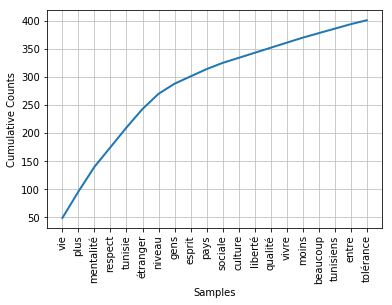

In [82]:
# cumulative frequency distribution of top 20 words in this corpus
fdist2.plot(20,cumulative=True)

## 4) Document representation with BOW-tfidf version

- Input: clean corpus
- Output: DTM matrix and vocabulary

In [83]:
# setup the cleaned corpus
Q5_corpus_fr_clean = [' '.join(doc) for doc in Q5_corpus_fr_words_3_2]
type(Q5_corpus_fr_clean),type(Q5_corpus_fr_clean[0]), len(Q5_corpus_fr_clean)

(list, str, 252)

In [84]:
# First Configuration parameters of the BOW model
max_words = 50 
maxdf = 0.9 #When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
mindf = 2 #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
tf_bow_model = CountVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr)

In [87]:
tf_bow_model.fit(Q5_corpus_fr_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=50, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...s', 'être', 'in', 'of', 'memes', 'q', 'sans', 'car', 'cest', 'nes', 'taarf', 'kife', 't3ish', 'pzs'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [88]:
## verify the vocabulary (remember that each feature corresponds to one vocabulary word)
tf_bow_vocab = tf_bow_model.get_feature_names()
print(type(tf_bow_vocab))
print(len(tf_bow_vocab))
print(tf_bow_vocab)

<class 'list'>
50
['amis', 'autre', 'beaucou', 'chaleur', 'civilis', 'civisme', 'conscie', 'culture', 'différe', 'droit', 'entre', 'esprit', 'etrange', 'existe', 'famille', 'gens', 'général', 'incompa', 'individ', 'liberté', 'manque', 'meilleu', 'mentali', 'mieux', 'mode', 'moins', 'niveau', 'organis', 'ouvertu', 'pays', 'plus', 'qualité', 'racisme', 'relatio', 'respect', 'sais', 'salaire', 'service', 'sociale', 'société', 'sécurit', 'toléran', 'tous', 'travail', 'trouve', 'tunisie', 'valeur', 'vie', 'vivre', 'étrange']


In [89]:
# Terms that were ignored because they either:
#      - occurred in too many documents (`max_df`)
#      - occurred in too few documents (`min_df`)
#      - were cut off by feature selection (`max_features`).

tf_bow_model.stop_words_

{'1500',
 '5m',
 'abroad',
 'absence',
 'accepta',
 'accepte',
 'accessi',
 'accès',
 'aceuill',
 'achat',
 'adaptat',
 'adminis',
 'affaire',
 'affecta',
 'affront',
 'aid',
 'aide',
 'aident',
 'ailleur',
 'aime',
 'air',
 'aise',
 'alaise',
 'alcool',
 'amalgam',
 'ambainc',
 'ambitio',
 'amuser',
 'amélior',
 'and',
 'applica',
 'arabe',
 'arrive',
 'arriver',
 'arriéré',
 'arrogan',
 'art',
 'aspect',
 'attitud',
 'attract',
 'aucun',
 'autonom',
 'avantag',
 'banalis',
 'barbari',
 'bas',
 'base',
 'beau',
 'better',
 'bien',
 'bienven',
 'bisou',
 'bonne',
 'bouger',
 'bénéfic',
 'ca',
 'cap',
 'capable',
 'capacit',
 'certain',
 'chacun',
 'chance',
 'changer',
 'chaumag',
 'chez',
 'choix',
 'citer',
 'civiliz',
 'clair',
 'comme',
 'comment',
 'commun',
 'communa',
 'compara',
 'compare',
 'complex',
 'compliq',
 'comport',
 'compri',
 'compte',
 'compéte',
 'concept',
 'conditi',
 'conduit',
 'conserv',
 'considé',
 'constam',
 'contre',
 'coopéra',
 'corbeil',
 'cosmopo',
 

In [90]:
# Second Configuration parameters of the BOW model
max_words = 1227 #This is the total number of words in the corpus
maxdf = 0.9 #When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
mindf = 2 #When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold

In [91]:
tf_bow_model = CountVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr)
tf_bow_model.fit(Q5_corpus_fr_clean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1227, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...s', 'être', 'in', 'of', 'memes', 'q', 'sans', 'car', 'cest', 'nes', 'taarf', 'kife', 't3ish', 'pzs'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [92]:
## verify the vocabulary (remember that each feature corresponds to one vocabulary word)
tf_bow_vocab = tf_bow_model.get_feature_names()
print(type(tf_bow_vocab))
print(len(tf_bow_vocab))
print(tf_bow_vocab)

<class 'list'>
142
['accepte', 'achat', 'adminis', 'affaire', 'ailleur', 'amis', 'arriver', 'autonom', 'autre', 'avantag', 'beaucou', 'bien', 'certain', 'chacun', 'chaleur', 'changer', 'chez', 'civilis', 'civisme', 'communa', 'compare', 'conscie', 'contre', 'coutume', 'crise', 'cultive', 'culture', 'devenir', 'differe', 'diffici', 'diffère', 'différe', 'dignité', 'dire', 'diversi', 'doit', 'droit', 'dépend', 'dévelop', 'empathi', 'encoura', 'entouré', 'entre', 'enver', 'environ', 'esprit', 'etrange', 'exemple', 'existe', 'faire', 'famille', 'gens', 'grand', 'groupe', 'général', 'habitan', 'homme', 'humain', 'humaine', 'identit', 'incompa', 'indiffé', 'individ', 'ingénie', 'langue', 'leurs', 'liberté', 'liens', 'loi', 'lois', 'malheur', 'manque', 'meilleu', 'meme', 'mentali', 'mieux', 'mode', 'moins', 'moral', 'mutuel', 'mêle', 'niveau', 'nouvell', 'organis', 'ouvert', 'ouvertu', 'parle', 'partage', 'pays', 'pense', 'personn', 'peu', 'peuple', 'plus', 'point', 'pouvoir', 'princip', 'pro

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
# create instance of class, we decide to work with the second configuration of parameters
tfidf_model = TfidfVectorizer(max_df=maxdf, min_df=mindf, max_features=max_words, stop_words=stop_words_fr, use_idf = True)

# call fit() method in order to prepare BOW method (determine cabulary and IDF values)
tfidf_model.fit(Q5_corpus_fr_clean)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1227, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 's...s', 'être', 'in', 'of', 'memes', 'q', 'sans', 'car', 'cest', 'nes', 'taarf', 'kife', 't3ish', 'pzs'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [95]:
## verify the vocabulary
## Remember that each feature corresponds to one vocabulary word
tfidf_vocab = tfidf_model.get_feature_names()
print(len(tfidf_vocab))
print(tfidf_vocab)

142
['accepte', 'achat', 'adminis', 'affaire', 'ailleur', 'amis', 'arriver', 'autonom', 'autre', 'avantag', 'beaucou', 'bien', 'certain', 'chacun', 'chaleur', 'changer', 'chez', 'civilis', 'civisme', 'communa', 'compare', 'conscie', 'contre', 'coutume', 'crise', 'cultive', 'culture', 'devenir', 'differe', 'diffici', 'diffère', 'différe', 'dignité', 'dire', 'diversi', 'doit', 'droit', 'dépend', 'dévelop', 'empathi', 'encoura', 'entouré', 'entre', 'enver', 'environ', 'esprit', 'etrange', 'exemple', 'existe', 'faire', 'famille', 'gens', 'grand', 'groupe', 'général', 'habitan', 'homme', 'humain', 'humaine', 'identit', 'incompa', 'indiffé', 'individ', 'ingénie', 'langue', 'leurs', 'liberté', 'liens', 'loi', 'lois', 'malheur', 'manque', 'meilleu', 'meme', 'mentali', 'mieux', 'mode', 'moins', 'moral', 'mutuel', 'mêle', 'niveau', 'nouvell', 'organis', 'ouvert', 'ouvertu', 'parle', 'partage', 'pays', 'pense', 'personn', 'peu', 'peuple', 'plus', 'point', 'pouvoir', 'princip', 'profess', 'qualite

In [96]:
# Sort vocabulary words in ASCENDING order of IDF value (from most frequent to least frequent)
pd.DataFrame(dict(Word=tfidf_vocab,IDF=tfidf_model.idf_)).sort_values("IDF", inplace=False, ascending = True).head(10)

,Word,IDF
74,mentali,2.582146
131,tunisie,2.641569
134,vie,2.726727
105,respect,2.819817
93,plus,2.844510
140,étrange,2.978041
81,niveau,3.275293
51,gens,3.760801
45,esprit,3.825339
66,liberté,3.825339


In [97]:
# compare vocabularies of TF model and TFIDF model
set(tfidf_vocab) - set(tf_bow_vocab)

set()

In [98]:
# Calculate DTM of our corpus
tfidf_dtm = tfidf_model.transform(Q5_corpus_fr_clean)

In [99]:
# Verify the type and size of this matrix
print(type(tfidf_dtm))
print(tfidf_dtm.shape)
# Number of non-zero values in this matrix
print(tfidf_dtm.nnz)

<class 'scipy.sparse.csr.csr_matrix'>
(252, 142)
825


In [100]:
# How many vocabulary terms are there in every document?
nb_terms_per_doc = np.array((tfidf_dtm>0).sum(axis=1))
print(type(nb_terms_per_doc))
print(nb_terms_per_doc.shape)
print(nb_terms_per_doc[0:10,0])

<class 'numpy.ndarray'>
(252, 1)
[4 2 1 5 1 1 1 4 1 3]


In [101]:
# In how many documents does each vocabulary term occur? -- Called the (absolute) document frequency (DF) of a term.
doc_freq = np.array((tfidf_dtm>0).sum(axis=0))
print(type(doc_freq))
print(doc_freq.shape)
print(doc_freq[0,0:10])

<class 'numpy.ndarray'>
(1, 142)
[ 3  3  3  2  4  4  2  2 11  2]


In [102]:
  # relative frequency i.e. proportion
rel_doc_freq = doc_freq / tfidf_dtm.shape[0]
print(type(rel_doc_freq))
print(rel_doc_freq.shape)
print(rel_doc_freq[0,0:5])

<class 'numpy.ndarray'>
(1, 142)
[0.01190476 0.01190476 0.01190476 0.00793651 0.01587302]


In [103]:
# put results in a data frame for easy visualization
u = pd.DataFrame(dict(word=tfidf_model.get_feature_names(),IDF=tfidf_model.idf_, df = doc_freq.ravel(), rel_df = rel_doc_freq.ravel()))
u

,word,IDF,df,rel_df
0,accepte,5.147095,3,0.011905
1,achat,5.147095,3,0.011905
2,adminis,5.147095,3,0.011905
3,affaire,5.434777,2,0.007937
4,ailleur,4.923952,4,0.015873
5,amis,4.923952,4,0.015873
6,arriver,5.434777,2,0.007937
7,autonom,5.434777,2,0.007937
8,autre,4.048483,11,0.043651
9,avantag,5.434777,2,0.007937


In [104]:
u.sort_values("IDF", inplace=False, ascending = True).head()

,word,IDF,df,rel_df
74,mentali,2.582146,51,0.202381
131,tunisie,2.641569,48,0.190476
134,vie,2.726727,44,0.174603
105,respect,2.819817,40,0.158730
93,plus,2.844510,39,0.154762


### Remove documents that contain 0 vocabulary words

In [105]:
nb_terms_per_doc = nb_terms_per_doc.ravel()  # convert to a 1D array
nb_terms_per_doc.shape

(252,)

In [106]:
pd.Series(nb_terms_per_doc.ravel()).value_counts()

1     66
2     61
3     38
4     23
5     19
7     10
0      8
6      7
8      7
9      2
11     2
12     2
13     2
15     2
17     1
10     1
21     1
dtype: int64

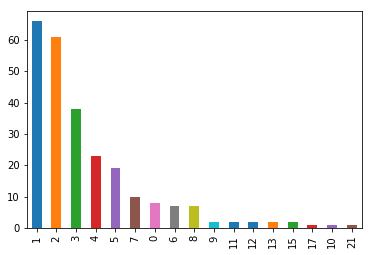

In [107]:
pd.Series(nb_terms_per_doc.ravel()).value_counts().plot(kind='bar')

In [108]:
idx = nb_terms_per_doc>0
tfidf_dtm_cropped = tfidf_dtm[nb_terms_per_doc>0,:]
Q5_corpus_fr_clean_cropped = [Q5_corpus_fr_clean[i] for i,x in enumerate(idx) if x]

In [109]:
doc_filter_2 = nb_terms_per_doc>0
assert(np.sum(doc_filter_2) == len(Q5_corpus_fr_clean_cropped))

In [110]:
print(tfidf_dtm.shape)
print(tfidf_dtm_cropped.shape)

(252, 142)
(244, 142)


In [111]:
print(len(Q5_corpus_fr_clean))
print(len(Q5_corpus_fr_clean_cropped))

252
244


In [112]:
# Show documents that were removed because they contain 0 vocabulary terms
[Q5_corpus_fr_clean[i] for i,x in enumerate(idx) if not x]

['',
 '',
 '',
 'tunisia better terms friend and family abroad better term cost living',
 '',
 'interdi vente alcool vendred',
 'compara',
 'règle']

## 5) Topic Modeling using LDA method
- **Input:** DTM matrix; corresponding vocabulary list; number of topics
- **Output:** LDA topics

We will try different number of topics and then choose the best number of topics based on visual inspection of the topic words and weights.

In [113]:
from sklearn.decomposition import LatentDirichletAllocation

In [114]:
dtm = tfidf_dtm_cropped
vocab = tfidf_vocab
Nb_Topics = 2 # We start by this one

In [115]:
# create instance of class
lda = LatentDirichletAllocation(n_components=Nb_Topics, learning_method='online', random_state=2019)

In [116]:
# call the fit() method of this class with the document-term matrix of our corpus.
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=2019, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

- The **fit**() method creates a KxN matrix in the ``model_components_`` data member, where K is number of topics and N is the number of vocabulary words.

- Every row in this matrix is a representation of a topic as a **weighted combination of words** (one weight value per vocabulary word)

In [117]:
assert(Nb_Topics == lda.components_.shape[0])
print(type(lda.components_))
print(lda.components_.shape)

<class 'numpy.ndarray'>
(2, 142)


In [118]:
# the sum of the rows of this matrix are not equal to 1
lda.components_.sum(axis=1)

array([275.29650007, 255.50292311])

In [119]:
# call transform() method obtain the matrix of document weights
lda_doc_weights = lda.transform(dtm)
lda_doc_weights

array([[0.74005575, 0.25994425],
       [0.23928363, 0.76071637],
       [0.25951077, 0.74048923],
       [0.27506717, 0.72493283],
       [0.25461309, 0.74538691],
       [0.25481168, 0.74518832],
       [0.74430537, 0.25569463],
       [0.17814912, 0.82185088],
       [0.74510414, 0.25489586],
       [0.68351821, 0.31648179],
       [0.78880452, 0.21119548],
       [0.73361324, 0.26638676],
       [0.79044902, 0.20955098],
       [0.74510414, 0.25489586],
       [0.78114711, 0.21885289],
       [0.83027413, 0.16972587],
       [0.778837  , 0.221163  ],
       [0.25341915, 0.74658085],
       [0.26931226, 0.73068774],
       [0.84417479, 0.15582521],
       [0.28778337, 0.71221663],
       [0.74510414, 0.25489586],
       [0.25681371, 0.74318629],
       [0.73944076, 0.26055924],
       [0.15698302, 0.84301698],
       [0.52111847, 0.47888153],
       [0.30687014, 0.69312986],
       [0.20922466, 0.79077534],
       [0.52127464, 0.47872536],
       [0.73777649, 0.26222351],
       [0.

In [120]:
# every row in this matrix contains the weights of one document, one weight value per topic.
print(type(lda_doc_weights))
print(lda_doc_weights.shape)

<class 'numpy.ndarray'>
(244, 2)


In [121]:
# verify that the sum of each row = 1
lda_doc_weights.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [122]:
lda.components_

array([[ 1.15392337,  2.01061656,  0.97893395,  1.23174744,  0.60061068,
         1.43411883,  0.57578792,  0.57554656,  4.45128379,  1.54888643,
         0.62312236,  1.31224656,  0.64174968,  2.25551779,  2.45740525,
         0.66760995,  1.00654266,  2.26210173,  2.49154939,  0.58840473,
         0.56010909,  1.39619877,  1.34707306,  1.33974446,  0.56071465,
         1.25545793,  7.28894531,  0.86273418,  1.01608764,  0.68335004,
         1.49652636,  3.63765759,  2.44097107,  0.55689103,  1.06004655,
         0.60178173,  0.82012902,  0.55997972,  2.24829994,  0.69768621,
         0.5802985 ,  1.26685257,  1.2056549 ,  0.85181431,  1.6292547 ,
         7.01603116,  1.60982413,  0.57254408,  0.80768675,  1.28300664,
         4.65444533,  7.30568916,  0.56140434,  1.1967886 ,  1.13106597,
         0.57701432,  0.60134569,  0.67949445,  1.25752418,  0.59137135,
         3.32535612,  0.98385307,  1.31324169,  0.89093433,  1.56311757,
         0.59481263,  5.73355878,  0.91654193,  0.9

### Understand and Interpret the Topics Weights
- Remember that ``lda.model_components_`` is a KxN matrix, where K is number of topics and N is the number of vocabulary words.
- Every row in this matrix is a representation of a topic as a **weighted combination of words** (one weight value per vocabulary word).
- We are going to analyze the values in this matrix to derive the meaning of each topic.

In [123]:
# select the first row of the lda.components_ matrix
x = lda.components_[0,:]
x

array([ 1.15392337,  2.01061656,  0.97893395,  1.23174744,  0.60061068,
        1.43411883,  0.57578792,  0.57554656,  4.45128379,  1.54888643,
        0.62312236,  1.31224656,  0.64174968,  2.25551779,  2.45740525,
        0.66760995,  1.00654266,  2.26210173,  2.49154939,  0.58840473,
        0.56010909,  1.39619877,  1.34707306,  1.33974446,  0.56071465,
        1.25545793,  7.28894531,  0.86273418,  1.01608764,  0.68335004,
        1.49652636,  3.63765759,  2.44097107,  0.55689103,  1.06004655,
        0.60178173,  0.82012902,  0.55997972,  2.24829994,  0.69768621,
        0.5802985 ,  1.26685257,  1.2056549 ,  0.85181431,  1.6292547 ,
        7.01603116,  1.60982413,  0.57254408,  0.80768675,  1.28300664,
        4.65444533,  7.30568916,  0.56140434,  1.1967886 ,  1.13106597,
        0.57701432,  0.60134569,  0.67949445,  1.25752418,  0.59137135,
        3.32535612,  0.98385307,  1.31324169,  0.89093433,  1.56311757,
        0.59481263,  5.73355878,  0.91654193,  0.93423248,  1.64

In [124]:
#  x contains the word weights corresponding to the first topic.
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(142,)


In [125]:
N = 10

print("Top 10 words for each topic:")
print()

for i in range(Nb_Topics):
    topic_weights = lda.components_[i,:]
    print ("Topic %d: " % (i), end='')
    print (" ".join([vocab[j]
                    for j in topic_weights.argsort()[:-N - 1:-1]]))
print()

Top 10 words for each topic:

Topic 0: mentali respect plus gens culture tunisie esprit travail liberté sais
Topic 1: vie niveau étrange tunisie toléran plus sociale qualité pays salaire



In [126]:
# The top 10 words and their weights in each topic
for i in range(0,Nb_Topics):
    print()
    print("Topic",i)
    print(pd.DataFrame(dict(term=vocab, topic_weight= lda.components_[i,:])).sort_values("topic_weight", ascending=False).head(10))


Topic 0
        term  topic_weight
74   mentali     29.389924
105  respect     17.381077
93      plus     10.139861
51      gens      7.305689
26   culture      7.288945
131  tunisie      7.049975
45    esprit      7.016031
129  travail      5.816138
66   liberté      5.733559
109     sais      4.870642

Topic 1
        term  topic_weight
134      vie     17.487908
81    niveau     12.491813
140  étrange      8.158141
131  tunisie      6.265164
126  toléran      6.037472
93      plus      5.013399
115  sociale      5.001065
99   qualité      4.943342
88      pays      4.747231
110  salaire      4.466243


#### Visualize topics as word clouds

A *WordCloud* is a graphic technique to display words such that word size is proportional to the importance of the word.

In [127]:
# Start with loading all necessary libraries
# from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [128]:
Max_Words = 30

In [129]:
# Create instane of class with default configuration parameters
wc = WordCloud(width = 1000, height = 500, min_font_size=4, max_words=Max_Words)

Topic 0


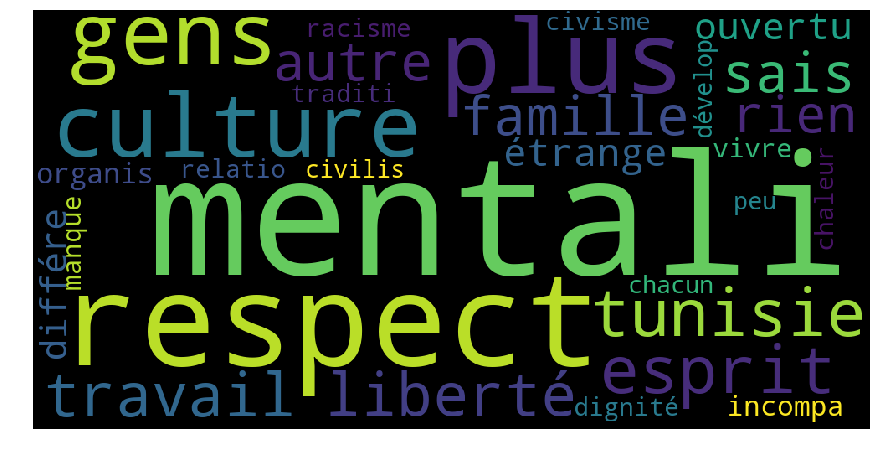

Topic 1


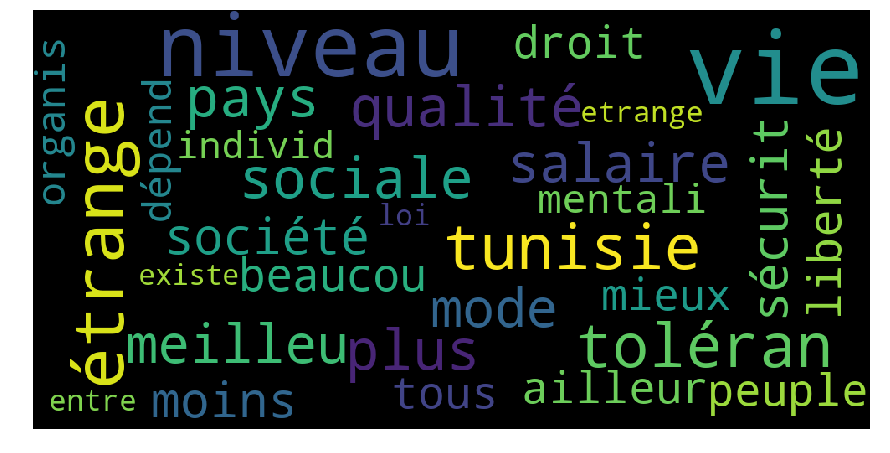

In [130]:
# generate a word cloud image by calling the generate_from_frequencies() method

# set maximum font size
MaxFont = 200

for i in range(Nb_Topics):
    print("Topic",i)
    # set the max font size for this topic
    weighted_MF = int( MaxFont * np.max(lda.components_[i,:]) / np.max(lda.components_) )
    d = dict(zip(vocab, lda.components_[i,:]))
    z = wc.generate_from_frequencies(d, max_font_size=weighted_MF)
    plt.figure(figsize=(15,8))
    plt.imshow(z)
    plt.axis("off")
    plt.show()
    # save to an image file
    # plt.savefig('topic.png', bbox_inches='tight')

### Naming the Topics
After careful study of the above results, we are now finally ready to give each topic a *name*, basically a *short phrase* that reflects the global **meaning** of the words with highest weight values in that topic.
However, that seems that having k= 2 is not a good configuration as topics displayed above look identical so we will change k.

### Change k

**In this part, we try another number of topics.**

In [131]:
dtm = tfidf_dtm_cropped
vocab = tfidf_vocab
Nb_Topics = 3

In [132]:
# create instance of class
lda = LatentDirichletAllocation(n_components=Nb_Topics, learning_method='online', random_state=2019)

In [133]:
# call the fit() method of this class with the document-term matrix of our corpus.
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=2019, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [134]:
assert(Nb_Topics == lda.components_.shape[0])
print(type(lda.components_))
print(lda.components_.shape)

<class 'numpy.ndarray'>
(3, 142)


In [135]:
# call transform() method obtain the matrix of document weights
lda_doc_weights = lda.transform(dtm)
lda_doc_weights

array([[0.44552387, 0.42053356, 0.13394258],
       [0.13973946, 0.14363369, 0.71662685],
       [0.1669958 , 0.16734339, 0.66566081],
       [0.28169811, 0.6095042 , 0.10879769],
       [0.16736681, 0.66499357, 0.16763962],
       [0.16738742, 0.66472547, 0.16788711],
       [0.16710054, 0.16697026, 0.6659292 ],
       [0.11429887, 0.77050985, 0.11519129],
       [0.66596009, 0.16723618, 0.16680373],
       [0.1286758 , 0.14316641, 0.72815779],
       [0.72215986, 0.13882674, 0.1390134 ],
       [0.66443956, 0.16808788, 0.16747256],
       [0.57637807, 0.13075209, 0.29286984],
       [0.66596009, 0.16723618, 0.16680373],
       [0.28542913, 0.14243989, 0.57213098],
       [0.18611124, 0.1075138 , 0.70637496],
       [0.71255936, 0.1435891 , 0.14385154],
       [0.16721453, 0.66508824, 0.16769723],
       [0.171285  , 0.66048939, 0.1682256 ],
       [0.78764472, 0.10109078, 0.11126449],
       [0.27314315, 0.62244288, 0.10441397],
       [0.66596009, 0.16723618, 0.16680373],
       [0.

In [136]:
# every row in this matrix contains the weights of one document, one weight value per topic.
print(type(lda_doc_weights))
print(lda_doc_weights.shape)

<class 'numpy.ndarray'>
(244, 3)


In [137]:
lda.components_

array([[ 0.99516096,  1.91424305,  0.9553109 ,  1.09636944,  0.38651113,
         0.39815217,  0.38600138,  0.3802439 ,  3.35434012,  0.87087819,
         0.4005995 ,  0.78829264,  0.4174897 ,  2.14581474,  0.51262596,
         0.41418936,  0.39491845,  1.63649475,  0.39274295,  0.38418865,
         0.37615648,  1.20314518,  0.60130314,  0.38440191,  0.38004748,
         1.11876706,  1.49488191,  0.377109  ,  0.8407617 ,  0.37659036,
         1.50048443,  3.60903985,  0.39734025,  0.37829043,  0.38719771,
         0.39825442,  0.7703312 ,  0.37819992,  1.67924384,  0.45167394,
         0.37891037,  0.37378209,  1.01470059,  0.69817145,  1.51583455,
         6.9230324 ,  0.85544826,  0.38011532,  0.6109984 ,  0.38596253,
         0.42829243,  7.03437622,  0.37969469,  1.06531693,  1.06785128,
         0.37269993,  0.38914606,  0.37952313,  1.06075786,  0.39419271,
         3.4045275 ,  0.39562439,  0.49022808,  0.86985916,  0.39182667,
         0.3895058 ,  0.46851784,  0.60641924,  1.1

### Understand and Interpret the Topics Weights

In [138]:
# select the first row of the lda.components_ matrix
x = lda.components_[0,:]
x

array([ 0.99516096,  1.91424305,  0.9553109 ,  1.09636944,  0.38651113,
        0.39815217,  0.38600138,  0.3802439 ,  3.35434012,  0.87087819,
        0.4005995 ,  0.78829264,  0.4174897 ,  2.14581474,  0.51262596,
        0.41418936,  0.39491845,  1.63649475,  0.39274295,  0.38418865,
        0.37615648,  1.20314518,  0.60130314,  0.38440191,  0.38004748,
        1.11876706,  1.49488191,  0.377109  ,  0.8407617 ,  0.37659036,
        1.50048443,  3.60903985,  0.39734025,  0.37829043,  0.38719771,
        0.39825442,  0.7703312 ,  0.37819992,  1.67924384,  0.45167394,
        0.37891037,  0.37378209,  1.01470059,  0.69817145,  1.51583455,
        6.9230324 ,  0.85544826,  0.38011532,  0.6109984 ,  0.38596253,
        0.42829243,  7.03437622,  0.37969469,  1.06531693,  1.06785128,
        0.37269993,  0.38914606,  0.37952313,  1.06075786,  0.39419271,
        3.4045275 ,  0.39562439,  0.49022808,  0.86985916,  0.39182667,
        0.3895058 ,  0.46851784,  0.60641924,  1.1173518 ,  1.48

In [139]:
#  x contains the word weights corresponding to the first topic.
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(142,)


In [140]:
N = 10

print("Top 10 words for each topic:")
print()

for i in range(Nb_Topics):
    topic_weights = lda.components_[i,:]
    print ("Topic %d: " % (i), end='')
    print (" ".join([vocab[j]
                    for j in topic_weights.argsort()[:-N - 1:-1]]))
print()

Top 10 words for each topic:

Topic 0: mentali respect gens esprit travail rien ouvertu différe plus incompa
Topic 1: vie niveau plus liberté étrange tunisie sociale qualité pays salaire
Topic 2: toléran culture tunisie organis sais famille plus vivre racisme étrange



In [141]:
# The top 10 words and their weights in each topic
for i in range(0,Nb_Topics):
    print()
    print("Topic",i)
    print(pd.DataFrame(dict(term=vocab, topic_weight= lda.components_[i,:])).sort_values("topic_weight", ascending=False).head(10))


Topic 0
        term  topic_weight
74   mentali     30.056079
105  respect     16.248851
51      gens      7.034376
45    esprit      6.923032
129  travail      5.666169
108     rien      3.941652
85   ouvertu      3.721811
31   différe      3.609040
93      plus      3.477950
60   incompa      3.404528

Topic 1
        term  topic_weight
134      vie     17.268035
81    niveau     12.424076
93      plus      8.470904
66   liberté      7.963526
140  étrange      7.713775
131  tunisie      5.237346
115  sociale      4.993519
99   qualité      4.787116
88      pays      4.648822
110  salaire      4.311104

Topic 2
        term  topic_weight
126  toléran      6.253757
26   culture      6.099284
131  tunisie      5.542306
83   organis      4.943634
109     sais      4.734305
50   famille      4.598873
93      plus      3.266597
135    vivre      2.478316
101  racisme      2.473917
140  étrange      2.432939


#### Visualize topics as word clouds

In [142]:
Max_Words = 30

In [143]:
# Create instane of class with default configuration parameters
wc = WordCloud(width = 1000, height = 500, min_font_size=4, max_words=Max_Words)

Topic 0


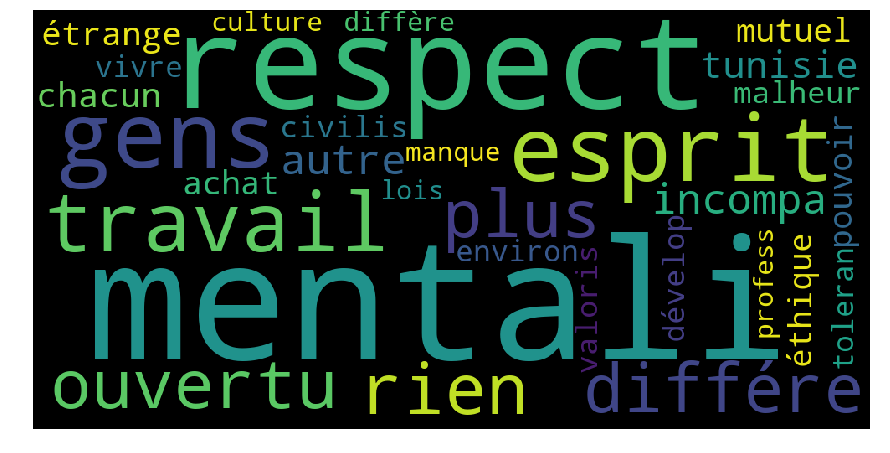

Topic 1


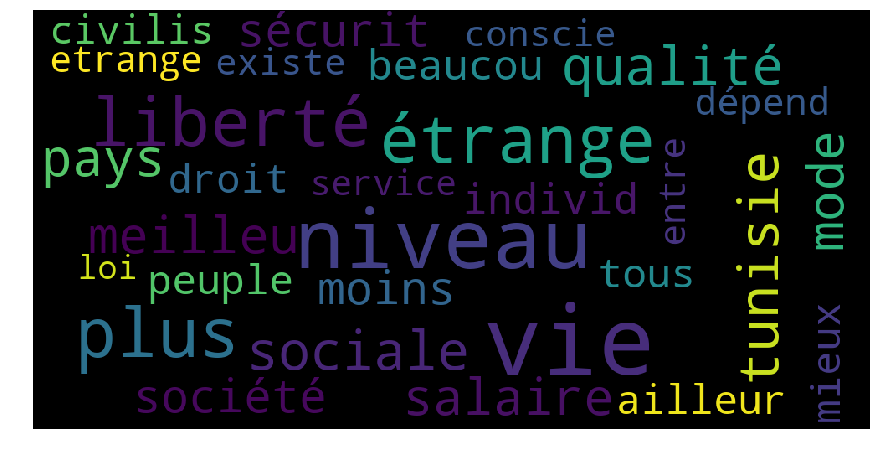

Topic 2


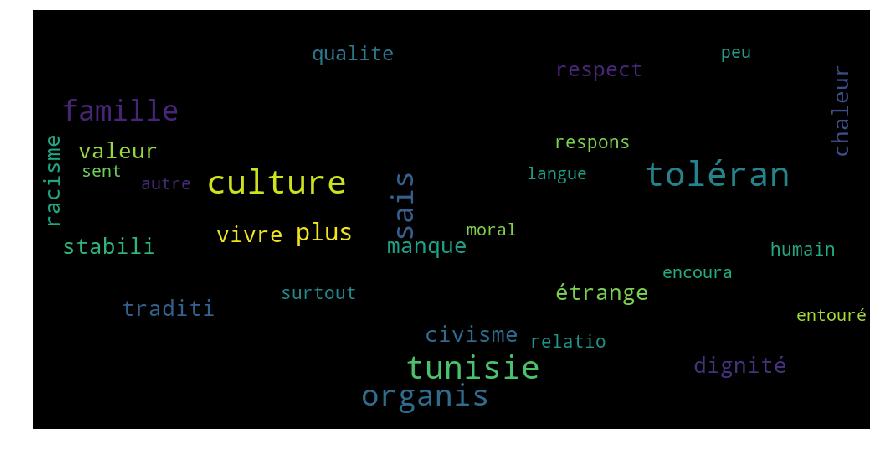

In [144]:
# generate a word cloud image by calling the generate_from_frequencies() method

# set maximum font size
MaxFont = 200

for i in range(Nb_Topics):
    print("Topic",i)
    # set the max font size for this topic
    weighted_MF = int( MaxFont * np.max(lda.components_[i,:]) / np.max(lda.components_) )
    d = dict(zip(vocab, lda.components_[i,:]))
    z = wc.generate_from_frequencies(d, max_font_size=weighted_MF)
    plt.figure(figsize=(15,8))
    plt.imshow(z)
    plt.axis("off")
    plt.show()
    # save to an image file
    # plt.savefig('topic.png', bbox_inches='tight')

### Naming the Topics

In [145]:
# THE LIST BELOW SHOULD CONTAIN A MEANINGFUL NAME OF EACH TOPIC
topic_names = []
topic_names = ['Social level', 'Mentality', 'Culture']

### Understand and Interpret Document Weights
- Remember that ``lda_doc_weights`` is a MxK matrix where M is the number of documents and K is the number of topics. 

- Every row in this matrix contains a representation of one document as a weighted combination of topics.

In [146]:
lda_doc_weights.shape

(244, 3)

#### Visualize documents as points in topic space

Text(0,0.5,'topic 1')

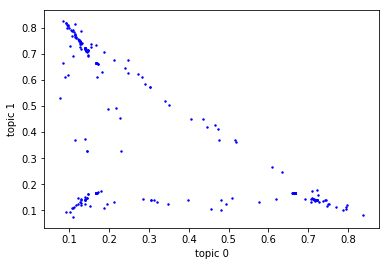

In [147]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,1],s=2, marker="o",color='blue')
plt.xlabel('topic 0')
plt.ylabel('topic 1')

Text(0,0.5,'topic 2')

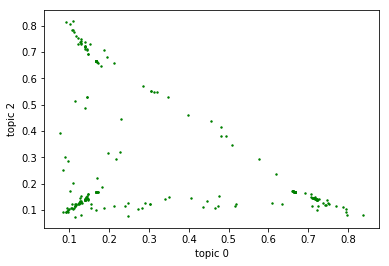

In [148]:
plt.scatter(lda_doc_weights[:,0],lda_doc_weights[:,2],s=2, marker="o",color='green')
plt.xlabel('topic 0')
plt.ylabel('topic 2')

#### Visualize dominant topic of documents
We define the 'dominant' topic of a document as the topic with the largest weight value for that document.

In [149]:
dom_topic_weights = pd.Series(np.max(lda_doc_weights,axis=1))
dom_topic_labels = pd.Series(np.argmax(lda_doc_weights,axis=1))

In [150]:
dom_topic_labels.value_counts()

1    98
0    89
2    57
dtype: int64

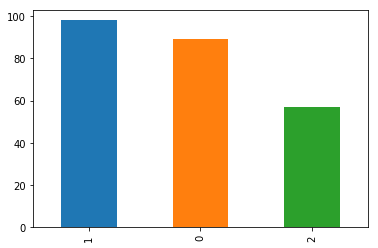

In [151]:
dom_topic_labels.value_counts().plot(kind='bar')

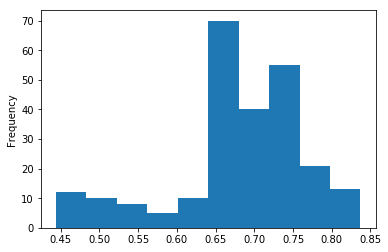

In [152]:
dom_topic_weights.plot(kind='hist')

In [153]:
dom_topic_weights.describe()

count    244.000000
mean       0.680855
std        0.086041
min        0.444104
25%        0.663015
50%        0.699630
75%        0.732535
max        0.836989
dtype: float64

In [154]:
np.sum((dom_topic_weights>.66) & (dom_topic_weights<.67))

63

In [155]:
# How many documents have a clearly dominant topic?
np.sum(dom_topic_weights>=0.666)

131

In [156]:
# How many documents do not have a clearly dominant topic
np.sum(dom_topic_weights<=0.5)

16

In [157]:
# Which documents do not have a clearly dominant topic
for i,x in enumerate(dom_topic_weights):
    if x<=0.5:
        print(lda_doc_weights[i,:],Q5_corpus_fr_clean_cropped[i])

[0.44552387 0.42053356 0.13394258] étrange trouve plus respect
[0.45547808 0.10586994 0.43865198] tunisie valoris plus liens famille relatio humaine plus facile établir
[0.21755997 0.49101185 0.29142819] mentali liberté individ civisme
[0.2275366  0.45344296 0.31902044] entre famille amis langue materne travail oublie parfoi existe autre pays concept vie différe nouvell langue nouvell culture nouvell rencont différe aspect vie vont enrichi reste vie vont pousser surmont peurs franchi cap expatri
[0.48203993 0.1017215  0.41623857] valoris respect mutuel étrange contre partie valeur solidar capacit adaptat tunisie
[0.40468382 0.45114593 0.14417025] respect droit
[0.48047264 0.13850414 0.38102322] culture travail
[0.13986491 0.37492071 0.48521438] stabili sociale
[0.39913988 0.14062061 0.46023951] mentali culture
[0.22858485 0.32731106 0.44410409] respect dignité liberté
[0.19733378 0.48725532 0.3154109 ] organis digital tous service respect
[0.43673921 0.45188091 0.11137987] barbari manq

### Label each document with corresponding dominant topic
Based on the above information about dominant topic, we are now ready to add a new column to our database; this column contains a categorization of Q4 answers to 3 categories.

In [158]:
df.shape

(258, 16)

In [159]:
# create a new column and initialize all its elements to 'Unknown'
df['Q5_category'] = "Unknown"

In [160]:
len(doc_filter_1),len(doc_filter_2),len(dom_topic_labels)

(258, 252, 244)

In [161]:
j = 0
k = 0
for i in range(df.shape[0]):
    if doc_filter_1[i]:
        if doc_filter_2[j]:
            df.loc[i,'Q5_category'] = topic_names[dom_topic_labels[k]]
            k=k+1
        j=j+1

In [162]:
np.sum(doc_filter_1),j

(252, 252)

In [163]:
np.sum(doc_filter_2),k

(244, 244)

In [164]:
df['Q5_category']

0      Social level
1           Culture
2           Culture
3         Mentality
4         Mentality
5         Mentality
6           Culture
7         Mentality
8      Social level
9           Culture
10     Social level
11     Social level
12     Social level
13     Social level
14          Culture
15          Culture
16     Social level
17        Mentality
18        Mentality
19     Social level
20        Mentality
21     Social level
22        Mentality
23        Mentality
24        Mentality
25          Unknown
26          Culture
27        Mentality
28        Mentality
29          Culture
           ...     
228    Social level
229       Mentality
230    Social level
231       Mentality
232    Social level
233         Unknown
234         Culture
235         Unknown
236    Social level
237    Social level
238         Culture
239       Mentality
240    Social level
241         Culture
242    Social level
243       Mentality
244       Mentality
245         Unknown
246       Mentality


In [165]:
df['Q5_category'].value_counts()

Mentality       98
Social level    89
Culture         57
Unknown         14
Name: Q5_category, dtype: int64

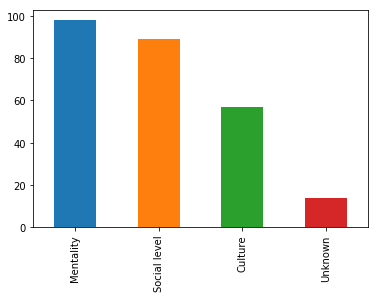

In [166]:
df['Q5_category'].value_counts().plot(kind='bar')

*****

## 6) Clustering
- In this part, we will show that topic modeling is actually more useful than clustering in understanding the content of our documents.

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [168]:
dtm = tfidf_dtm_cropped

### a) Using BOW feature vectors
Here we use the rows of the DTM matrix as the feature vectors for clustering.

In [169]:
# create instance of KMeans class
km = KMeans(n_clusters=2, random_state=10)

# run kMeans algorithm
km.fit(dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [170]:
# Determine the value of SSD (Sum of Squared Distances)
km.inertia_

210.4139530358754

In [171]:
# Number of documents in each cluster
pd.Series(km.labels_).value_counts()

1    205
0     39
dtype: int64

### Elbow method
Use the 'elbow' method in order to find best number of clusters.

In [172]:
K_values = range(1,11)
Sum_of_squared_distances = []   # initialize empty list to store SSD values
for k in K_values:  # be careful, k not K
    km = KMeans(n_clusters=k, random_state=10)   # create instance of KMeans class
    km.fit(dtm)  # run kMeans algorithm
    Sum_of_squared_distances.append(km.inertia_)

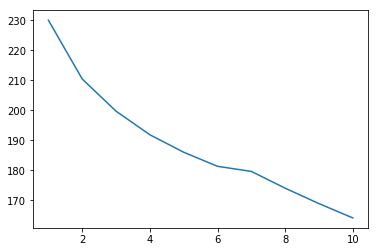

In [173]:
# plot the SSD curve
plt.plot(K_values,Sum_of_squared_distances)
#plt.ylim([0, 200])

### b) Using LDA weights
Here we use the rows of the doc_weights matrix as the feature vectors for clustering.

In [174]:
# create instance of KMeans class
km2 = KMeans(n_clusters=2, random_state=10)

# run kMeans algorithm
km2.fit(lda_doc_weights)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [175]:
# Determine the value of SSD (Sum of Squared Distances)
km2.inertia_

21.185356126374437

In [176]:
# Number of documents in each cluster
pd.Series(km2.labels_).value_counts()

0    146
1     98
dtype: int64

### Elbow method
Use the 'elbow' method in order to find best number of clusters.

In [177]:
K_values = range(1,11)
Sum_of_squared_distances2 = []
for k in K_values:
    km_ = KMeans(n_clusters=k, random_state=6724)   # create instance of KMeans class
    km_.fit(lda_doc_weights)
    Sum_of_squared_distances2.append(km_.inertia_)

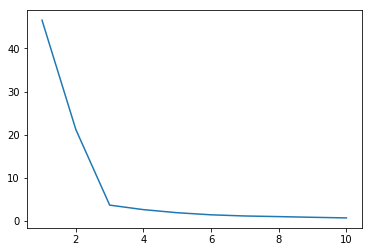

In [178]:
# plot the SSD curve
plt.plot(K_values,Sum_of_squared_distances2)
#plt.ylim([0, 50])

## 7) Predictive Modeling
We would like to extract a predictive model of the form: ``Q5_category = f(other non-text attributes)`` which will help us understand how the answers vary based on the characteristics of the respondent. Obviously, this is a **classification** problem.


### a) Data Preparation

In [179]:
df2 = df.copy()

In [180]:
df2.columns[1:9] # predictor variables

Index(['Votre âge', 'Sexe', 'Etat civil', 'Niveau d'étude',
       'Etablissement d'études', 'Situation professionnelle', 'Région',
       'Domaine d'études'],
      dtype='object')

In [181]:
df2.dtypes[1:9]

Votre âge                    object
Sexe                         object
Etat civil                   object
Niveau d'étude               object
Etablissement d'études       object
Situation professionnelle    object
Région                       object
Domaine d'études             object
dtype: object

In [182]:
df2.iloc[:,1:9].head()

,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études
0,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur
1,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur
2,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique
3,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur
4,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales


In [183]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:9].nunique(axis=0)

Votre âge                     3
Sexe                          2
Etat civil                    2
Niveau d'étude                3
Etablissement d'études       82
Situation professionnelle     3
Région                        4
Domaine d'études             44
dtype: int64

In [184]:
df2['Votre âge'].value_counts()

20-25         208
26-30          34
31 et plus     16
Name: Votre âge, dtype: int64

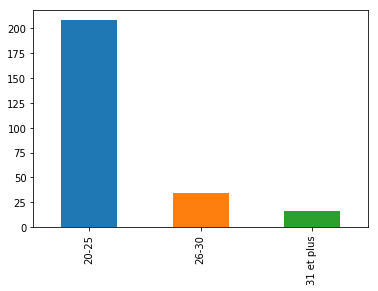

In [185]:
df2['Votre âge'].value_counts().plot(kind='bar')

In [186]:
df2['Sexe'].value_counts()

Femme    131
Homme    127
Name: Sexe, dtype: int64

In [187]:
df2['Etat civil'].value_counts()

Célibataire    234
Marié           23
Name: Etat civil, dtype: int64

In [188]:
df2['Niveau d\'étude'].value_counts()

Ingénieur    173
Licence       48
Mastère       37
Name: Niveau d'étude, dtype: int64

In [189]:
df2['Région'].value_counts()

Grand Tunis    175
Autre           62
Sfax            12
Sousse           9
Name: Région, dtype: int64

In [190]:
# The "Etablissement d'études" attribute also has too many distinct values!
df2['Etablissement d\'études'].value_counts()

INSAT                                              86
ENIT                                               38
FST                                                14
ESSAI                                              11
ESPRIT                                              6
ENSI                                                6
ISSHT                                               5
ENSIT                                               3
ISI                                                 3
Issht                                               3
INAT                                                3
Sup'Com                                             3
Esprit                                              3
FSB                                                 2
ENIM                                                2
ULT                                                 2
ESSECT                                              2
ISG                                                 2
IPSAS                       

In [191]:
# Let's reduce the number of values of the "Etablissement d'études" attribute
df2.loc[~df2['Etablissement d\'études'].isin(['INSAT', 'ENIT','FST','ESSAI']),'Etablissement d\'études'] = 'Other'
df2['Etablissement d\'études'].value_counts()

Other    109
INSAT     86
ENIT      38
FST       14
ESSAI     11
Name: Etablissement d'études, dtype: int64

In [192]:
# The "Domaine d'études" attribute also has too many distinct values!
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur                        181
Sciences humaines et sociales                   14
Economie et gestion                             12
Médecine                                         5
Informatique                                     4
Pharmacie                                        2
Biologie industrielle                            2
Réseaux informatiques et télécommunications      2
Droit                                            1
Systèmes, signaux et données.                    1
Statistique et Analyse de l'information          1
Science informatique                             1
Artistique                                       1
informatique de gestion                          1
biologie medical                                 1
Informatique (Génie Logiciel)                    1
Génie énergétique                                1
Sciences de l'informatique                       1
Kinésithérapie                                   1
Economie et ingénierie agricole

In [193]:
# We find that it would be better to reduce the number of distinct values to 5 instead of only 2. 
df2.loc[~df2['Domaine d\'études'].isin(['Sciences de l\'Ingénieur', 'Sciences humaines et sociales','Economie et gestion ','Médecine','Informatique']),'Domaine d\'études'] = 'Other'

In [194]:
# verify the number of distinct values in each predictor attribute
df2.iloc[:,1:9].nunique(axis=0)

Votre âge                    3
Sexe                         2
Etat civil                   2
Niveau d'étude               3
Etablissement d'études       5
Situation professionnelle    3
Région                       4
Domaine d'études             5
dtype: int64

In [195]:
df2['Domaine d\'études'].value_counts()

Sciences de l'Ingénieur          181
Other                             54
Sciences humaines et sociales     14
Médecine                           5
Informatique                       4
Name: Domaine d'études, dtype: int64

### b) Pattern Extraction (modeling)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [197]:
df2.dtypes[1:9]

Votre âge                    object
Sexe                         object
Etat civil                   object
Niveau d'étude               object
Etablissement d'études       object
Situation professionnelle    object
Région                       object
Domaine d'études             object
dtype: object

In python, library “sklearn” requires features in numerical arrays. Therefore
we resort to **Label Encoder** which is used to transform non-numerical labels to numerical labels (or nominal categorical variables). We create a class named **MultiColumLabelEncoder** that responds to the fit(), transform(), and fit_transform() so that we may indicate which columns we want exactly to transform.

In [198]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [199]:
df2=MultiColumnLabelEncoder(columns = ['Votre âge','Sexe','Etat civil','Niveau d\'étude','Etablissement d\'études','Situation professionnelle','Région','Domaine d\'études','Q5_category']).fit_transform(df2.astype(str))

In [200]:
df2.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?,Q5_category
0,10/30/2018 18:57:24,0,0,0,0,3,0,1,3,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...,2
1,10/30/2018 22:33:57,0,1,0,0,0,0,1,3,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche,0
2,10/31/2018 10:25:17,1,0,0,2,4,1,1,2,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation,0
3,10/31/2018 10:28:55,2,1,1,1,2,1,1,3,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere...",1
4,10/31/2018 10:29:24,0,0,0,2,4,1,1,4,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ...",1


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
df3= df2.iloc[:,[1,2,3,4,5,6,7,8,16]]
df3.head()

,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,Q5_category
0,0,0,0,0,3,0,1,3,2
1,0,1,0,0,0,0,1,3,0
2,1,0,0,2,4,1,1,2,0
3,2,1,1,1,2,1,1,3,1
4,0,0,0,2,4,1,1,4,1


In [203]:
target = df3['Q5_category'].values 

In [204]:
X_train, X_test, y_train, y_test = train_test_split(df3, target, test_size=0.3)

In [205]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180, 9) (180,)
(78, 9) (78,)


In [206]:
# Train the model
# # all parameters not specified are set to their defaults, only the default solver "liblinear" is incredibly 
#slow thats why we change it
logRegr = LogisticRegression(solver = 'lbfgs')
model = logRegr.fit(X_train,y_train)
predictions = logRegr.predict(X_test)
predictions

array([1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0], dtype=int64)

Text(0,0.5,'Predictions')

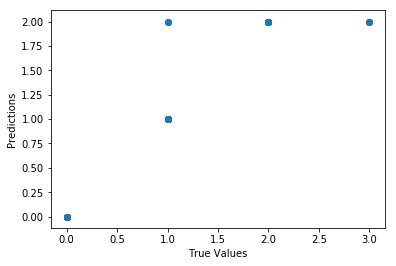

In [207]:
# Let's plot the model
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [208]:
# And print the accuracy score: 
print("Score:", model.score(X_test, y_test))

Score: 0.9358974358974359


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, we are showing a confusion matrice of our model being more understandable and visually appealing.

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

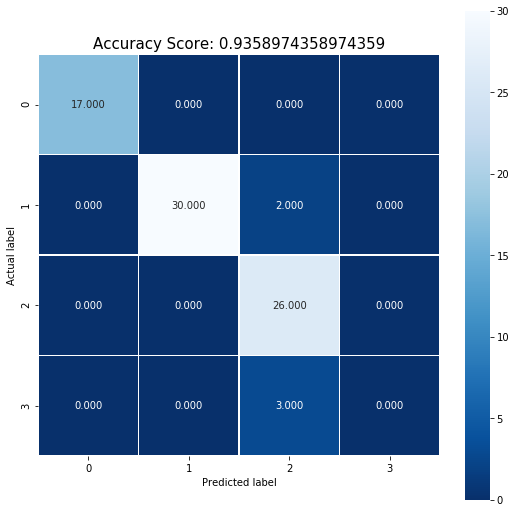

In [210]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

We can deduce that our model is well performed as we obtain a high value of the score.

Here is a summary of what we did : We've split it into a training and testing sets, fitted a regression model to the training data, made predictions based on this data and tested the predictions on the test data.

In [211]:
# display the parameters of the model
print(logRegr.coef_)

[[ 0.19562004 -0.11273423 -0.00689934  0.03617549 -0.05865381  0.30031397
  -0.03819408 -0.04741434 -4.57382381]
 [-0.27126954  0.47638654  0.05507867 -0.03137832  0.10113944 -0.41133071
   0.18590967  0.0170594  -0.58412395]
 [ 0.27189529 -0.65736873  0.33698512  0.16130306 -0.11622278 -0.37991487
   0.07214015 -0.29347254  2.26427451]
 [-0.21501049  0.3747493  -0.31458028 -0.29918437  0.02365619  0.23105714
  -0.30608987  0.66816683  3.37948489]]


In our case, we have a multi class problem. Therefore you have as much coef_ arrays as classifiers. There are 4 arrays as displayed above.

## 8) Visualization and interpretation of results
- A picture is worth a thousand words! Therefore, we will rovide some graphic plots that highlight the relationship between Q5_catgory and other attributes.

In [212]:
import seaborn as sns # It's a library for visualization
sns.set(style="darkgrid")

In [213]:
df.head()

,Timestamp,Votre âge,Sexe,Etat civil,Niveau d'étude,Etablissement d'études,Situation professionnelle,Région,Domaine d'études,"Quel est le CODE de la personne qui vous a envoyé ce formulaire ? (Cela doit etre un nombre entre 1 et 52. Ecrire ""autre"" si vous ne l'avez pas)",Q1 : Qu'est-ce qui vous ferait rester en Tunisie ?,Q2 : Quel salaire vous fera rester en Tunisie ?,Q3 : Qu'est-ce qui encouragerait les étrangers à venir en Tunisie ?,Q4 : Qu'est-ce qui vous ferait partir à l'étranger ?,Q5 : Quelle est la différence au point de vue social entre la Tunisie et l'étranger ?,Q6 : Quelle est la différence au point de vue professionnel entre la Tunisie et l'étranger ?,Q5_category
0,10/30/2018 18:57:24,20-25,Femme,Célibataire,Ingénieur,INSAT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,student's order in the official list of TICV s...,"mes études, ma famille et mon entourage",2000,le tourisme,la volonté de faire de l'expérience et de fair...,A l'étranger on trouve plus de respect.,A l'étranger ils payent plus et ils sont plus ...,Social level
1,10/30/2018 22:33:57,20-25,Homme,Célibataire,Ingénieur,ENIT,Etudiant,Grand Tunis,Sciences de l'Ingénieur,Autre,Rien,2000,Réputation,Niveau de conscience populaire,La valeur d homme,Recherche,Culture
2,10/31/2018 10:25:17,26-30,Femme,Célibataire,Mastère,ESAD,Fonctionnaire,Grand Tunis,Artistique,22,La mentalité,2000 dinars,la sécurité,l'argent,la tolérance,la motivation,Culture
3,10/31/2018 10:28:55,31 et plus,Homme,Marié,Licence,FST,Fonctionnaire,Grand Tunis,Sciences de l'Ingénieur,22,Qualité de vie,3500,"Pour un investisseur, la rémunération des empl...",L'expérience + le salaire,La mentalité sur le niveau professionnel et so...,"À l'étranger, les expériences sont plus intere...",Mentality
4,10/31/2018 10:29:24,20-25,Femme,Célibataire,Mastère,Faculté des Sciences Humaines et Sociales de T...,Fonctionnaire,Grand Tunis,Sciences humaines et sociales,22,Une bonne ambiance de travail,2000 dinars,"Les bonnes conditions climatiques, la convivia...",Des fourchettes salariales plus importantes et...,Une meilleure parité en matière de compétence,"T es payé pour ta compétence, les plafonds de ...",Mentality


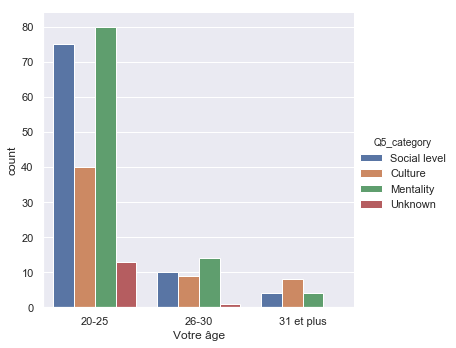

In [214]:
sns.catplot(x="Votre âge", hue="Q5_category", kind="count", data=df)

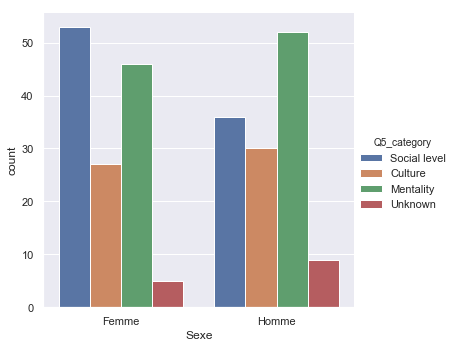

In [215]:
sns.catplot(x="Sexe", hue="Q5_category", kind="count", data=df)

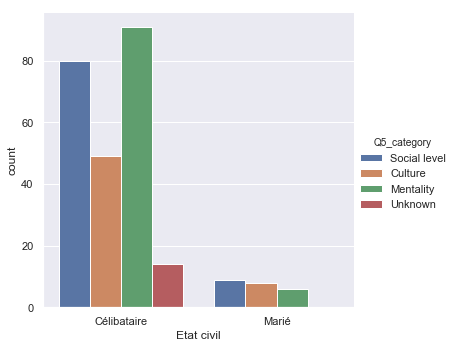

In [216]:
sns.catplot(x="Etat civil", hue="Q5_category", kind="count", data=df)

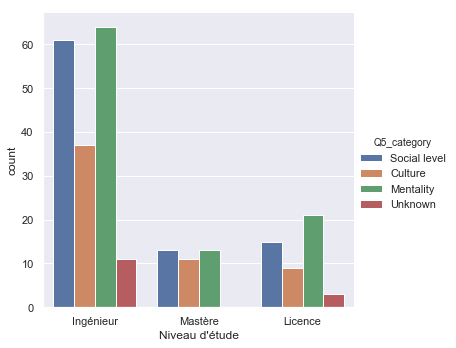

In [217]:
sns.catplot(x="Niveau d\'étude", hue="Q5_category", kind="count", data=df)

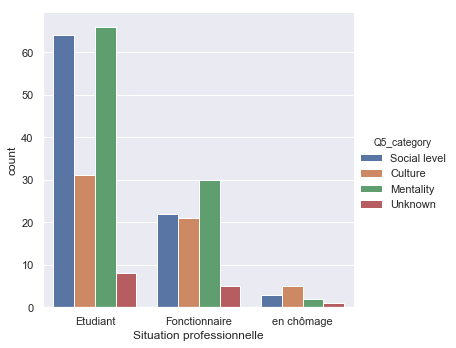

In [218]:
sns.catplot(x="Situation professionnelle", hue="Q5_category", kind="count", data=df)

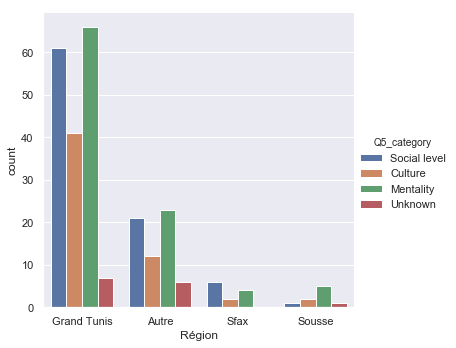

In [219]:
sns.catplot(x="Région", hue="Q5_category", kind="count", data=df)